In [106]:
from neuralprophet import NeuralProphet
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [70]:
def make_df(filename, ID, slicing = 0):
    df = pd.read_csv(filename)
    
    if slicing:
        l = len(df)
        df = df.head(slicing)
        print(f'sliced into {len(df)} out of {l} data.')
        
    df.rename(columns={'Date' : 'ds' , 'S' : 'y'}, inplace = True)
    
    df['ds'] = pd.to_datetime(df['ds'])
    df.set_index('ds', inplace = True)
    df_daily = df.resample('D').mean()
    
    df_daily['H'].fillna(method='ffill', inplace = True)
    df = df_daily.reset_index()
    df['ID'] = ID
    
    df = df[['ds','y','H','ID']]
    
    return df

In [71]:
# 298 기간

df1 = make_df('H-S_seq_1.csv',ID = 'data1')
df2 = make_df('H-S_seq_2.csv',ID = 'data2')
df3 = make_df('H-S_seq_3.csv',ID = 'data3')
df4 = make_df('H-S_seq_4.csv',ID = 'data4')
df5 = make_df('H-S_seq_5.csv',ID = 'data5')
df6 = make_df('H-S_seq_6.csv',ID = 'data6')
df7 = make_df('H-S_seq_7.csv',ID = 'data7')
df8 = make_df('H-S_seq_8.csv',ID = 'data8')
df3_test = make_df('H-S_seq_3.csv',ID = 'data3', slicing = 5)
# df2_test = make_df('H-S_seq_2.csv',ID = 'data2', slicing = 5)

df = pd.concat((df1,df2,df4,df6,df7,df8))

sliced into 5 out of 62 data.


In [72]:
m = NeuralProphet(learning_rate=0.1, 
                  yearly_seasonality=False, 
                  weekly_seasonality=False, 
                  unknown_data_normalization=True, 
                  newer_samples_weight = 4,
                  n_forecasts=10,
                  drop_missing = True,
                  optimizer = 'AdamW'
                  )

m = m.add_future_regressor(name='H', normalize=True)
# metrics = m.fit(df,freq='D')
metrics = m.fit(df)

WARNING - (NP.forecaster.fit) - Changing n_forecasts to 1. Without lags, the forecast can be computed for any future time, independent of lagged values
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe 

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


,ds,y,ID,residual1,yhat1,trend,future_regressors_additive,future_regressor_H
0,2021-08-06,0.000,data4,2.235614,2.235614,2.235614,0.000000,0.000000
1,2021-08-07,NaN,data4,NaN,2.493392,2.493392,0.000000,0.000000
2,2021-08-08,NaN,data4,NaN,2.751169,2.751169,0.000000,0.000000
3,2021-08-09,NaN,data4,NaN,3.008946,3.008946,0.000000,0.000000
4,2021-08-10,NaN,data4,NaN,3.266723,3.266723,0.000000,0.000000
...,...,...,...,...,...,...,...,...
293,2022-05-26,NaN,data4,NaN,57.156979,51.839386,5.317594,5.317594
294,2022-05-27,57.412,data4,-0.238809,57.173191,51.855602,5.317594,5.317594
295,2022-05-28,NaN,data4,NaN,57.189404,51.871811,5.317594,5.317594
296,2022-05-29,NaN,data4,NaN,57.205612,51.888020,5.317594,5.317594


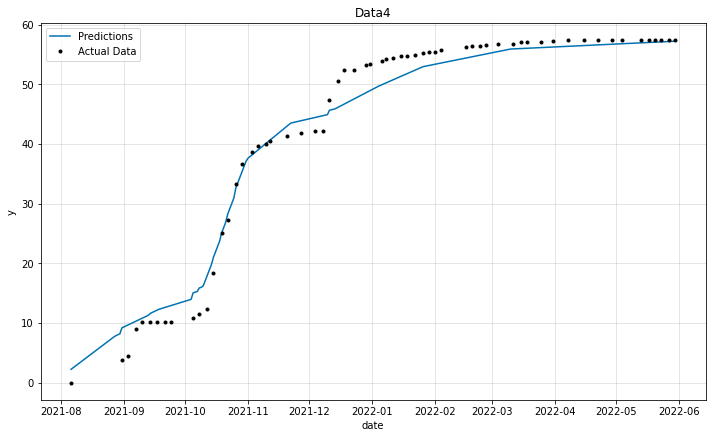

In [73]:
forecast4 = m.predict(df4)
m.plot(forecast4, xlabel='date', plotting_backend='matplotlib')
# m.plot(forecast4, xlabel='4')
plt.title('Data4')
plt.legend(['Predictions','Actual Data'])

pd.set_option('display.max_rows', 10)
forecast4

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.675% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.675% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


,ds,y,ID,residual1,yhat1,trend,future_regressors_additive,future_regressor_H
0,2021-08-06,0.0,data4,2.235614,2.235614,2.235614,0.000000,0.000000
1,2021-08-07,NaN,data4,NaN,2.493392,2.493392,0.000000,0.000000
2,2021-08-08,NaN,data4,NaN,2.751169,2.751169,0.000000,0.000000
3,2021-08-09,NaN,data4,NaN,3.008946,3.008946,0.000000,0.000000
4,2021-08-10,NaN,data4,NaN,3.266723,3.266723,0.000000,0.000000
...,...,...,...,...,...,...,...,...
303,2022-06-05,NaN,data4,NaN,57.319088,52.001495,5.317594,5.317594
304,2022-06-06,NaN,data4,NaN,57.335297,52.017704,5.317594,5.317594
305,2022-06-07,NaN,data4,NaN,57.351509,52.033916,5.317594,5.317594
306,2022-06-08,NaN,data4,NaN,57.367722,52.050129,5.317594,5.317594


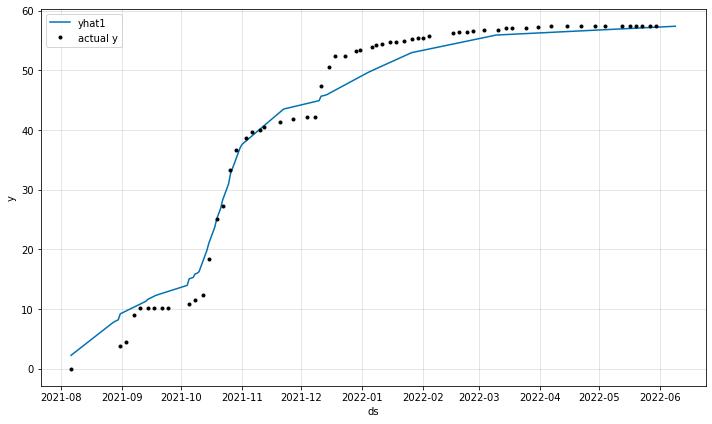

In [74]:
# 미래 10단계 예측

future_regressor = pd.DataFrame({'H':[3.968]*10})

future = m.make_future_dataframe(df4, regressors_df= future_regressor, periods=10, n_historic_predictions=True)
forecast_future = m.predict(future)

m.plot(forecast_future)

pd.set_option('display.max_rows', 10)
forecast_future

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


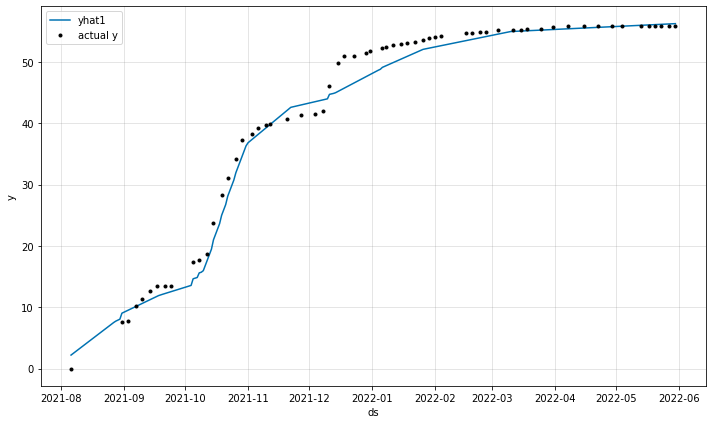

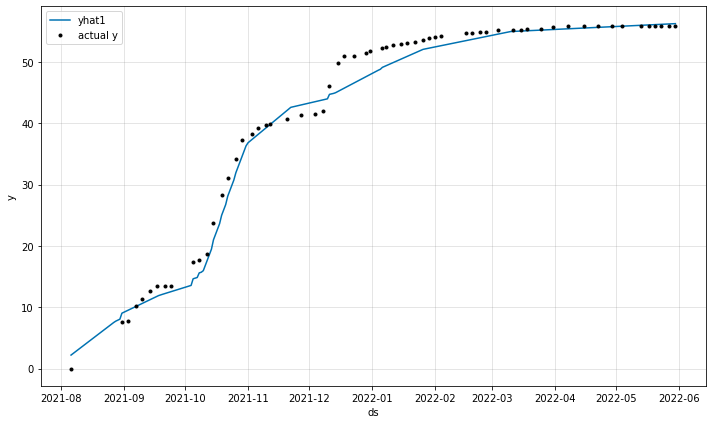

In [111]:
forecast3 = m.predict(df3)
m.plot(forecast3)

# 재학습

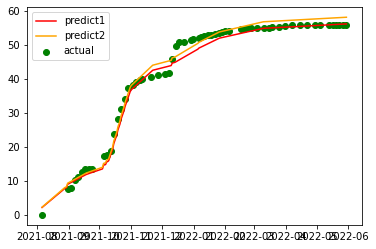

In [120]:
l=0
psum=0
for idx, row in df3.dropna().iterrows():
    
    l+=1
    if l>50:break
    
    actual = df3.loc[idx]['y']
    predict = forecast3.loc[idx]['yhat1']
    if actual==0 or predict == 0: continue
    # psum+
    psum+=(actual-predict)/actual
    
    # print(actual == (predict)/(1-p))
p = psum/l
new_forecast = forecast3.copy()
new_forecast['yhat1'] = forecast3['yhat1']/(1-p)


plt.plot(forecast3['ds'],forecast3['yhat1'],label = 'predict1',color='r')
plt.plot(new_forecast['ds'],new_forecast['yhat1'],label = 'predict2',color='orange')
plt.scatter(df3['ds'],df3['y'],label='actual',color='g')
plt.legend()
plt.show()
